To illustrate the use of Eigenvalue decomposition for visualization.
    
    
    

In [1945]:
#importing required libraries

In [1946]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import linalg as la

import warnings
warnings.filterwarnings("ignore") 

### CONTEXT OF THE DATASET

This dataset contain information related to real estate properties.
Total Entries: 2919
Columns (Features): 81
These columns represent various attributes or characteristics of the properties.

In [1947]:
#reading the train data 

In [1948]:
train=pd.read_csv(r'D:\praxis july 24\praxis requirements\Project\train.csv')

In [1949]:
#checking for the shape of the train data
train.shape

(1460, 81)

In [1950]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1951]:
#reading the test data
test=pd.read_csv(r'D:\praxis july 24\praxis requirements\Project\test.csv')

In [1952]:
#checking for the shape of test data
test.shape

(1459, 80)

In [1953]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1954]:
#concating the train and test data
df=pd.concat([train,test])

In [1955]:
#checking for the shape of the concatinated data
df.shape

(2919, 81)

In [1956]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [1957]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [1958]:
#checking for the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [1959]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [1960]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [1961]:
null_counts = df.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [1962]:
null_percent = df.isnull().sum()/df.shape[0]*100
column_null_percent=null_percent[null_percent>0]
column_null_percent

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [1963]:
#selecting all the numerical columns
df.select_dtypes('number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,NaN
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,NaN
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [1964]:
#selecting all the numerical columns
df.select_dtypes('O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [1965]:
#Observation 

#There are 2919 rows and 81 columns
#The columns are mix of categorical and numerical
#The label column is Saleprice
#there are 38 numerical column and 43 numerical column

#There are null values in the dataset.

In [1966]:
#now the number of rows got reduced from 81 to 74

In [1967]:
# Describing the target 
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

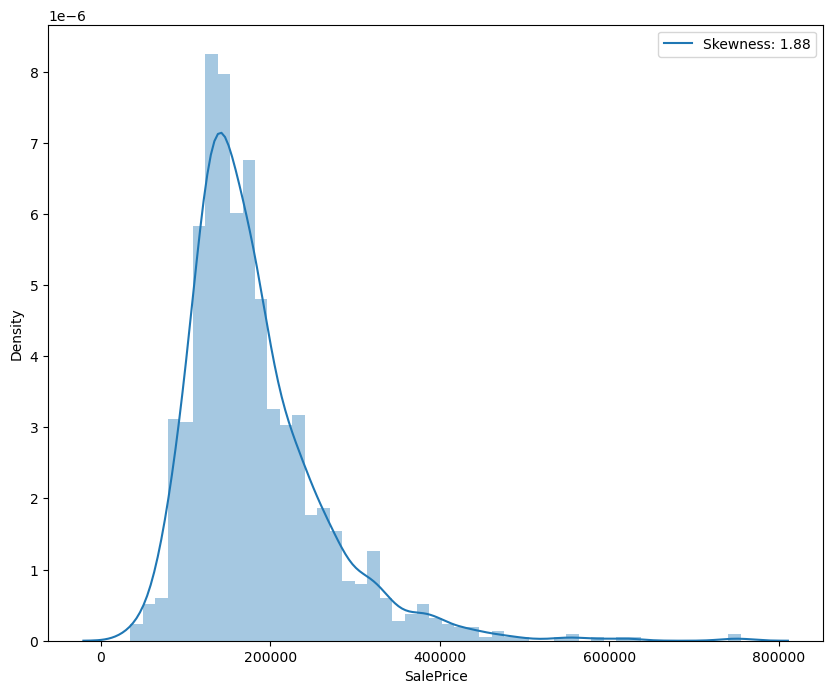

In [1968]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(df["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(train['SalePrice'].skew())])

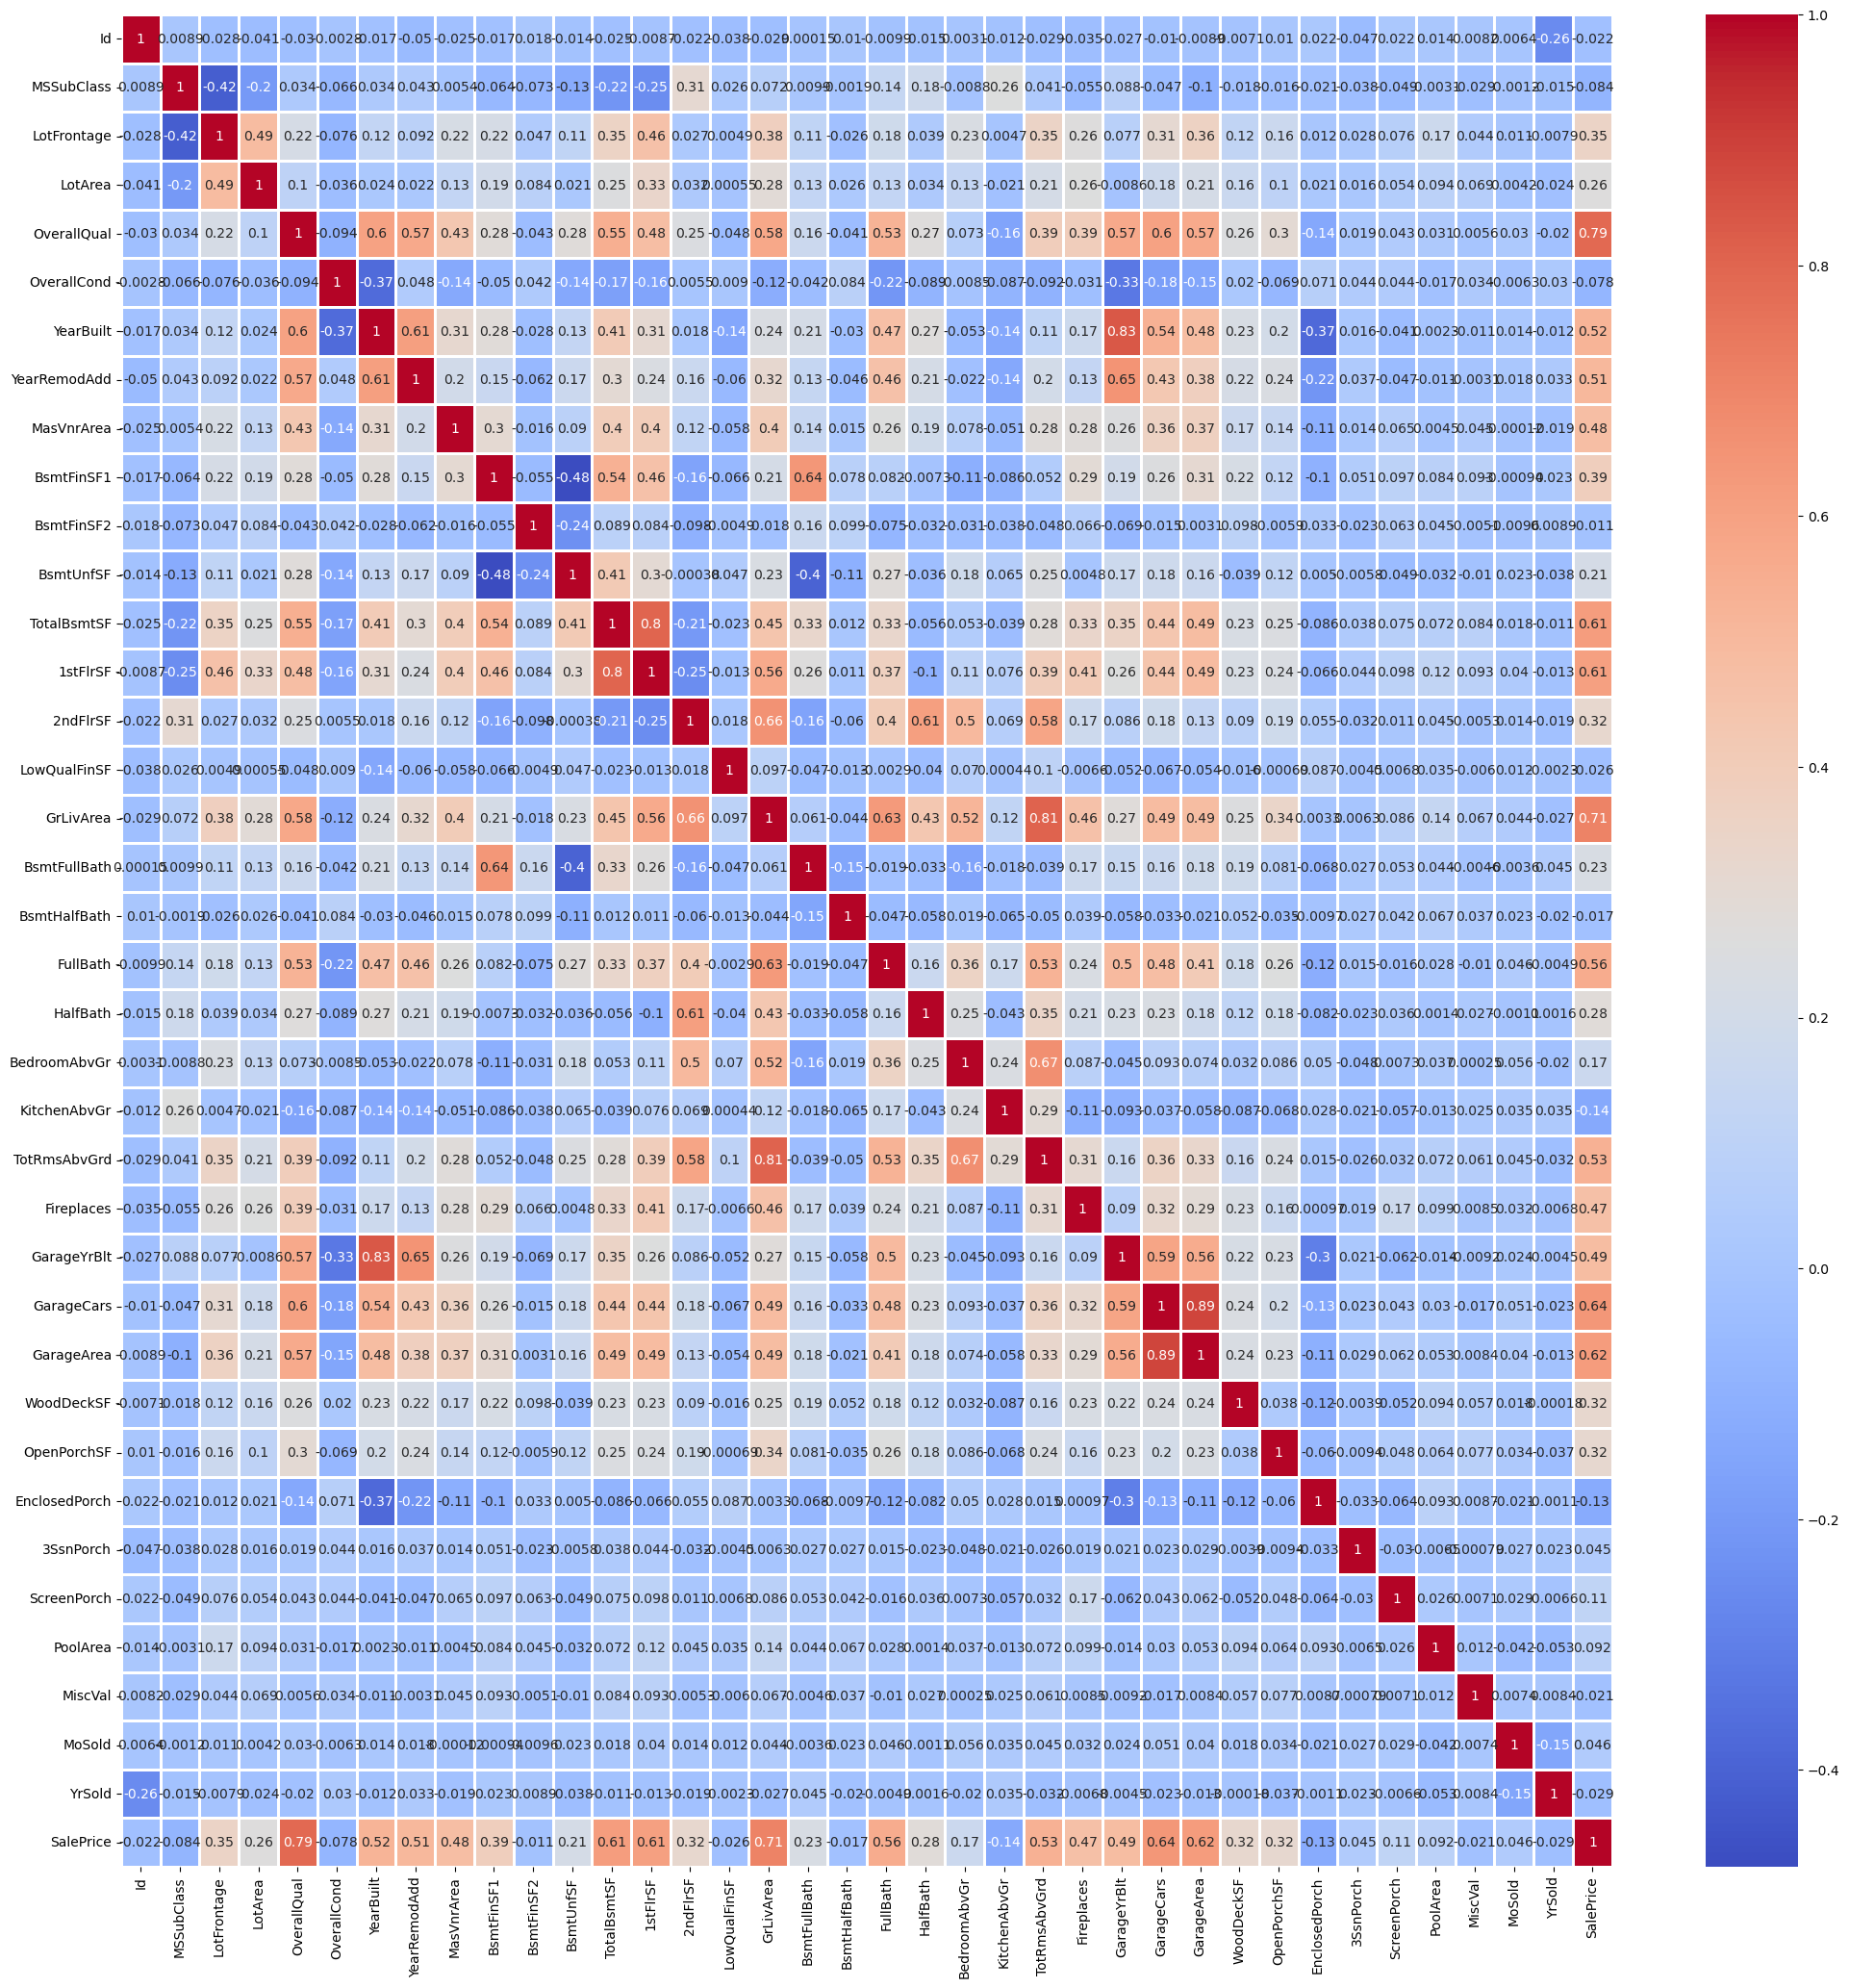

In [1969]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.select_dtypes('number').corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

In [1970]:
 #correlation heatmap of higly correlated features with SalePrice
hig_corr = df.select_dtypes('number').corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]
hig_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

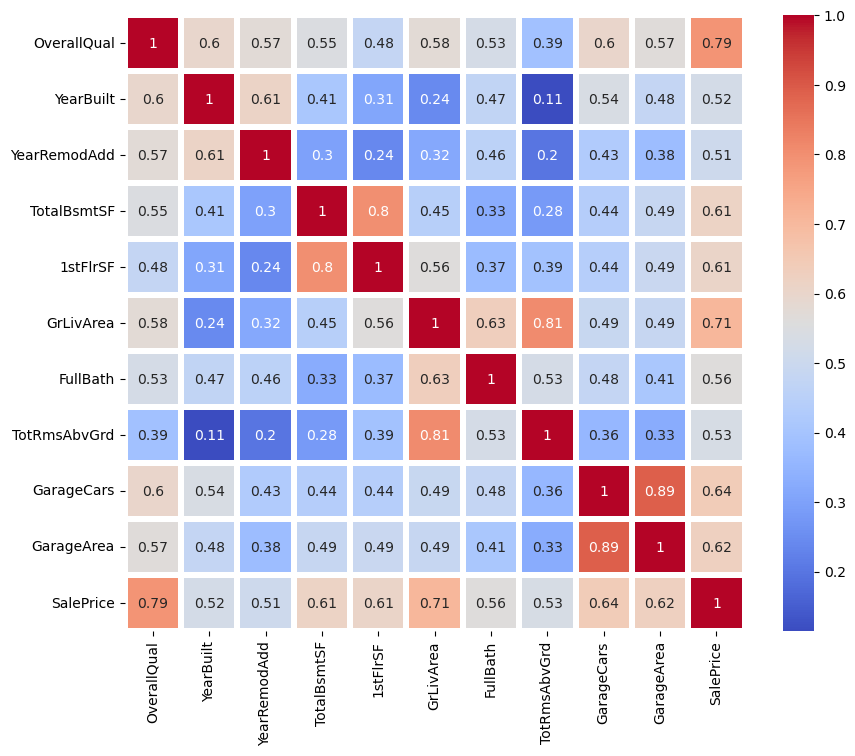

In [1971]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.select_dtypes('number')[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)


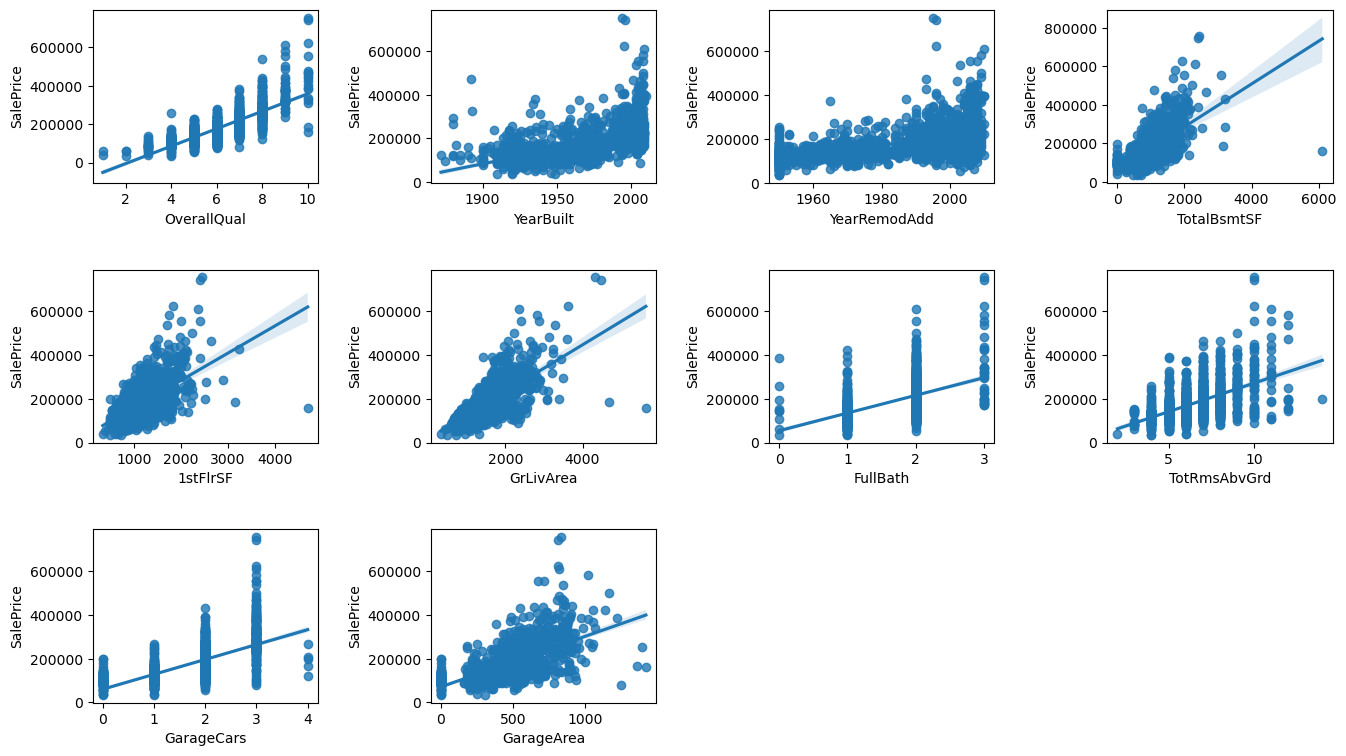

In [1972]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=df, x = hig_corr_features[i], y = 'SalePrice')

### Univariate Analysis of Numerical columns

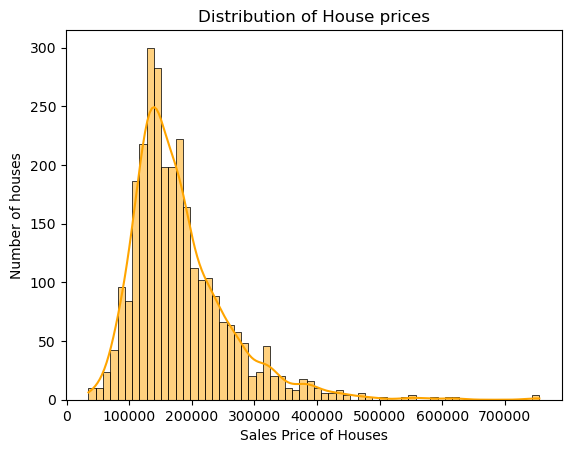

In [1973]:
#checking for the distribution of the house price using histogram plot
sns.histplot(data =df,x = 'SalePrice',kde = True,color = 'Orange')
plt.title("Distribution of House prices")
plt.xlabel("Sales Price of Houses")
plt.ylabel('Number of houses')
plt.show()

In [1974]:
#Observation:

#The distribution of the saleprice is right skewed data. 

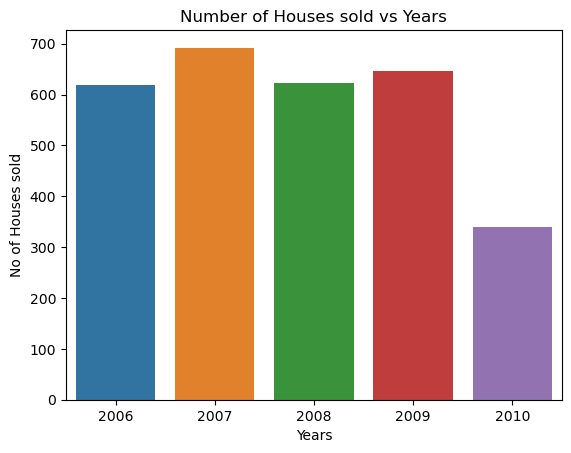

In [1975]:
#checking for the no of houses sold over the years using count plot
sns.countplot(data =df,x = 'YrSold')
plt.xlabel("Years")
plt.ylabel("No of Houses sold")
plt.title("Number of Houses sold vs Years")
plt.show()

In [1976]:
#Observation:

#year 2010 has seen lesser number houses sold

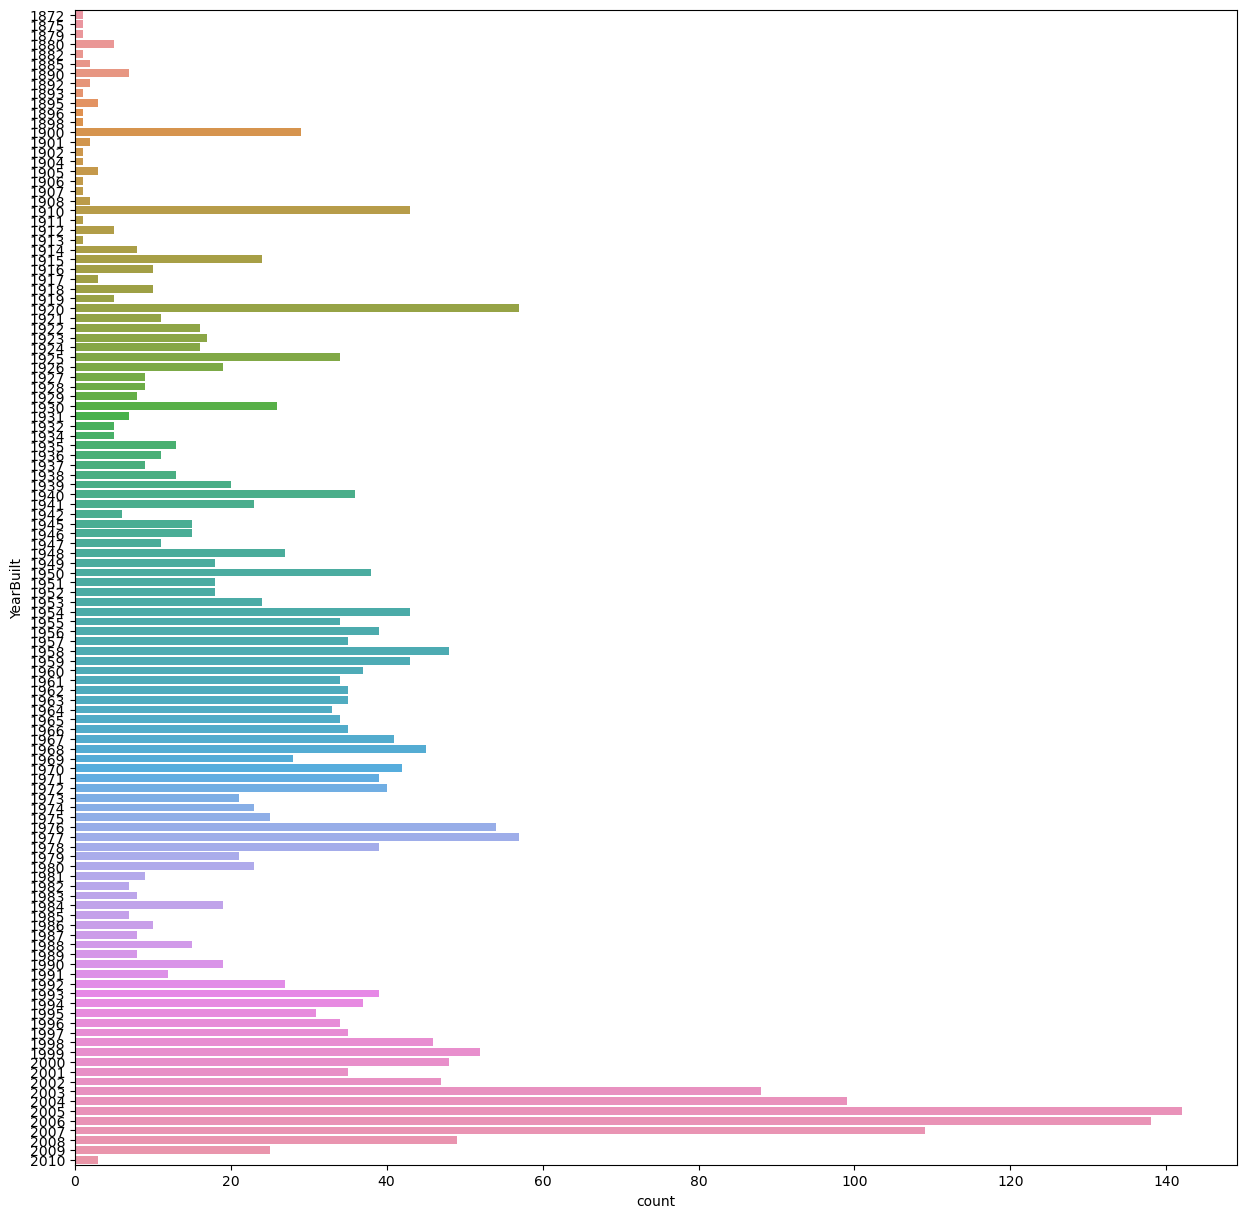

In [1977]:
#checking for the number of houses built in each year
plt.figure(figsize = (15,15))
sns.countplot(data = df,y = 'YearBuilt')
plt.show()

In [1978]:
#Observation

#year 2004 has seen more number of houses built

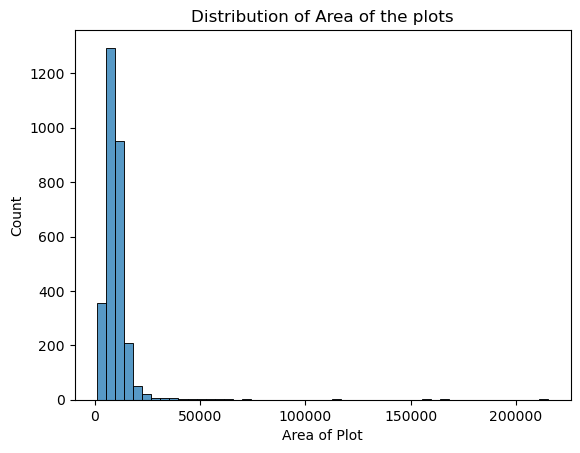

In [1979]:
#checking for the distribution of lot area
sns.histplot(data = df,x = 'LotArea',bins=50)
plt.title("Distribution of Area of the plots")
plt.xlabel("Area of Plot")
plt.show()

In [1980]:
#Observation:

#The data of the area distribution is right skewed with outliers

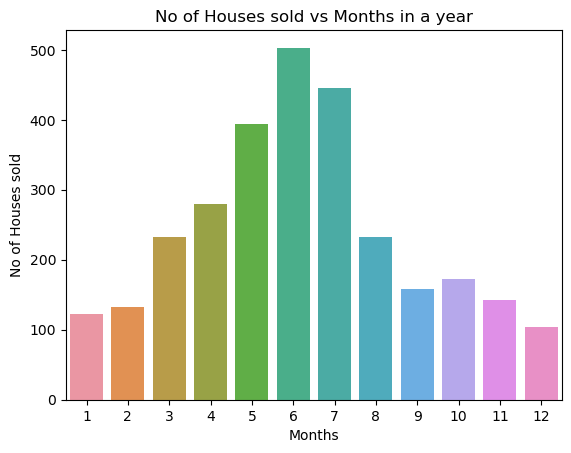

In [1981]:
#checking for total number of houses sold in each month over the years
sns.countplot(data = df,x='MoSold')
plt.title("No of Houses sold vs Months in a year")
plt.xlabel("Months")
plt.ylabel("No of Houses sold")
plt.show()

In [1982]:
#Observation:

#The month June has more demand of houses while the december has seen the lowest demand

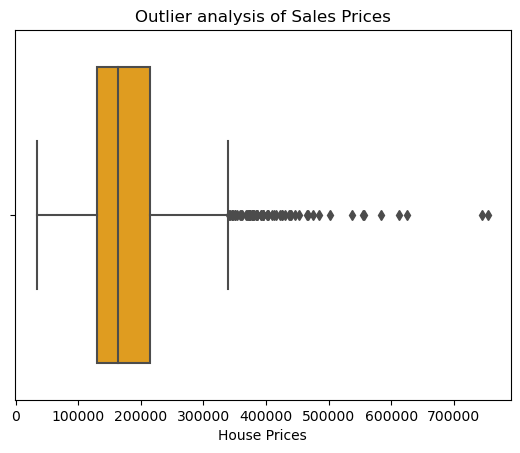

In [1983]:
#checking for the outlier in the sales price using box plot
sns.boxplot(data =df,x = 'SalePrice',color = 'Orange')
plt.xlabel('House Prices')
plt.title('Outlier analysis of Sales Prices')
plt.show()

In [1984]:
#Observation

#The salesprice column has outliers

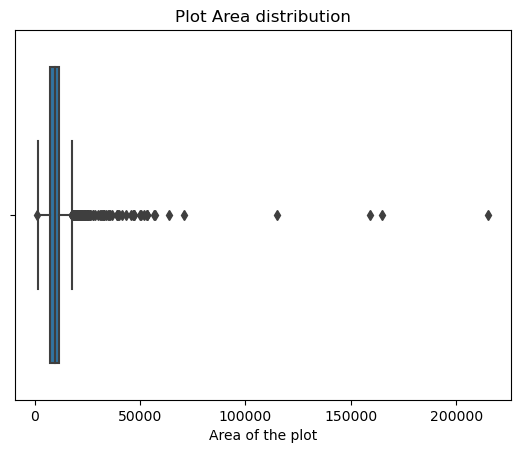

In [1985]:
#checking for the outlier in the LotArea using box plot
sns.boxplot(data = df,x ='LotArea')
plt.xlabel('Area of the plot')
plt.title('Plot Area distribution')
plt.show()

In [1986]:
#Observations

#There are outliers in lot area

### Bivariate analysis of Numerical Columns

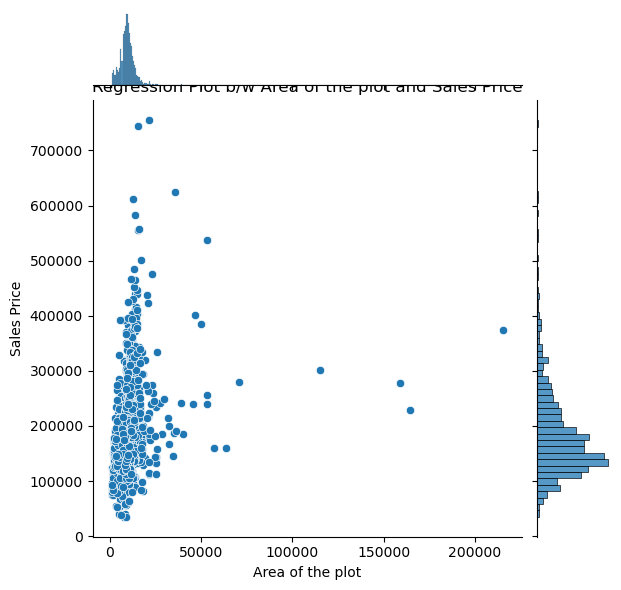

In [1987]:
#to create a joint plot between the 'LotArea' and 'SalePrice' columns of dataset. 
#This plot will display the relationship between these two variables.
sns.jointplot(data =df,x = 'LotArea',y = 'SalePrice')
plt.xlabel('Area of the plot')
plt.ylabel('Sales Price')
plt.title('Regression Plot b/w Area of the plot and Sales Price')
plt.show()

In [1988]:
#There is weak positive correlation between in the Lot area and Salesprices

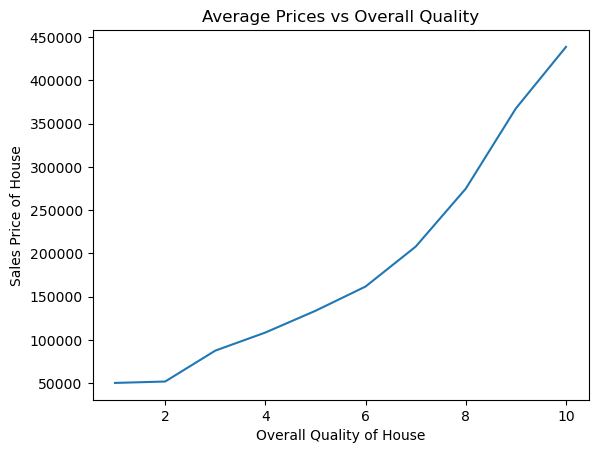

In [1989]:
#to visualize the relationship between the 'OverallQual' and 'SalePrice' columns in dataset using line plot
df['SalePrice'].groupby(df['OverallQual']).mean().plot(kind='line')
plt.xlabel('Overall Quality of House')
plt.ylabel('Sales Price of House')
plt.title("Average Prices vs Overall Quality")
plt.show()

In [1990]:
#Observation:
#There is positive relation between the overall quality and salesprice of the house

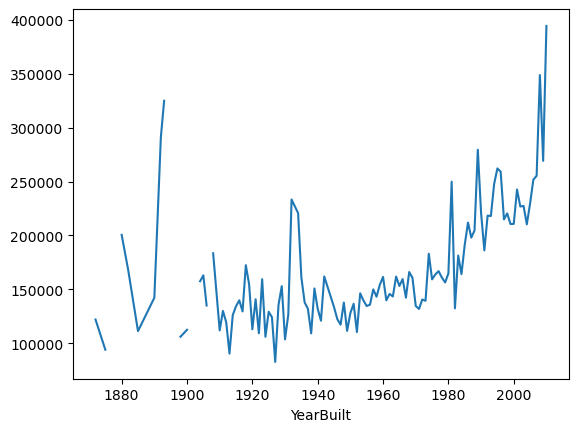

In [1991]:
#to illustrate the relationship between the 'YearBuilt' and the average 'SalePrice' of houses in dataset. 
df['SalePrice'].groupby(df['YearBuilt']).mean().plot(kind = 'line')
plt.show()

In [1992]:
#Observation

#Newly constructed houses has higher average prices when compared with the older houses

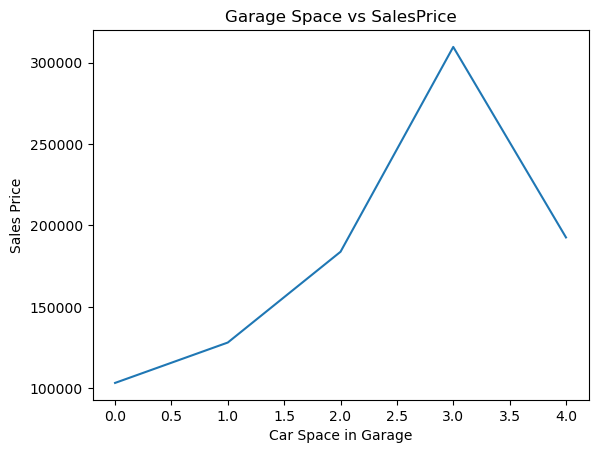

In [1993]:
#to depict the relationship between the 'GarageCars' (number of cars that can fit in the garage) and the average 'SalePrice' of houses in dataset.
df['SalePrice'].groupby(df['GarageCars']).mean().plot(kind = 'line')
plt.xlabel('Car Space in Garage')
plt.ylabel('Sales Price')
plt.title('Garage Space vs SalesPrice')
plt.show()

In [1994]:
#Observation

#The Salesprice of house is more for a house more no of car spaces in the garage. But the average value of the house drops 4 no car spaces

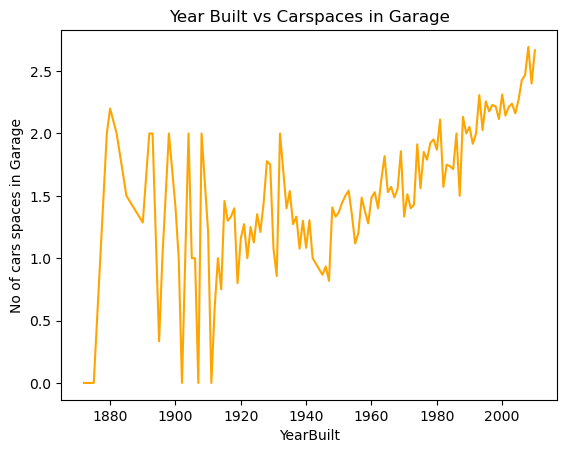

In [1995]:
#This visualization provides insights into how the average garage capacity has changed over the years based on the construction year of the houses.
df['GarageCars'].groupby(df['YearBuilt']).mean().plot(kind = 'line',color = 'orange')
plt.ylabel('No of cars spaces in Garage')
plt.title('Year Built vs Carspaces in Garage')
plt.show()

In [1996]:
#Observation

#The car spaces for the recently constructed houses has more when compared with the older houses

### Multivariate analysis of Numerical Columns

In [1997]:
#Observation

#The dataset has more RL zones houses

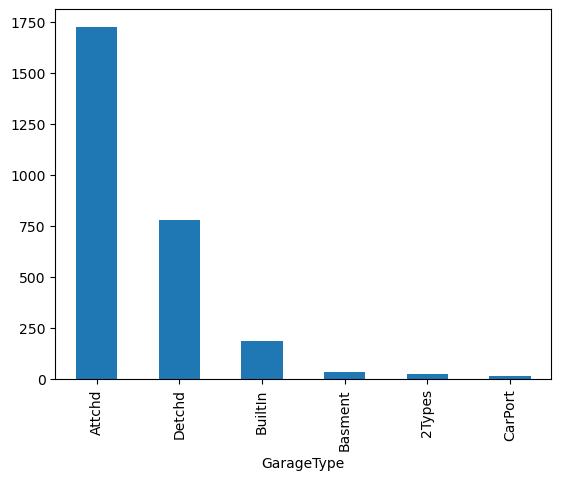

In [1998]:
#to create a bar plot to visualize the distribution of different garage types
df_cat['GarageType'].value_counts().plot(kind = 'bar')
plt.show()

In [1999]:
#Observations

#95% of the houses has the attached garage

<Axes: xlabel='GarageType'>

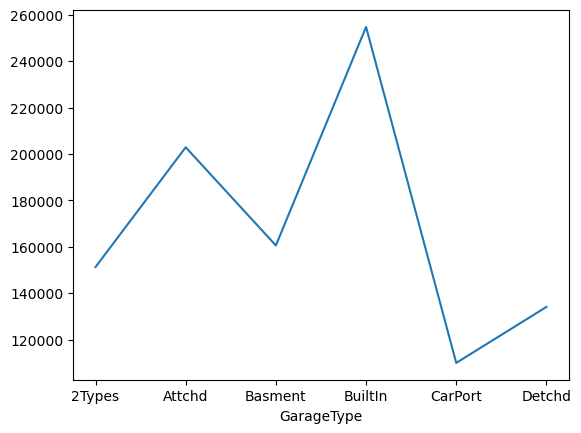

In [2000]:
#to understand how the type of garage is related to the average sale price of houses.
df['SalePrice'].groupby(df['GarageType']).mean().plot(kind  = 'line')

In [2001]:
#Observation

#The house with builtin garage is pricier when compared with the houses with other types of garages

<Axes: xlabel='LotShape'>

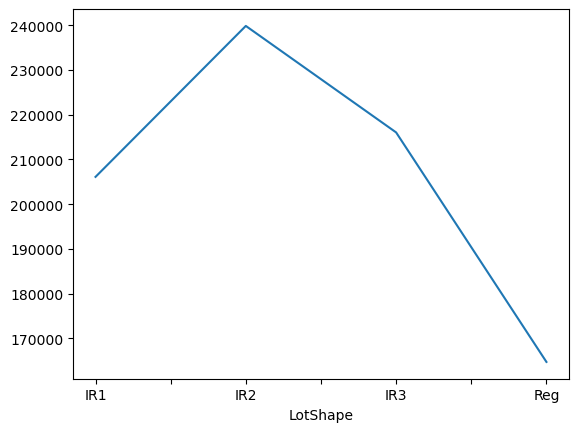

In [2002]:
#To visualize how the average sale price varies with different lot shapes.
df['SalePrice'].groupby(df['LotShape']).mean().plot(kind = 'line')

In [2003]:
#Observation

#IR2 shaped plots are pricier than the other plots

<Axes: xlabel='LotArea', ylabel='SalePrice'>

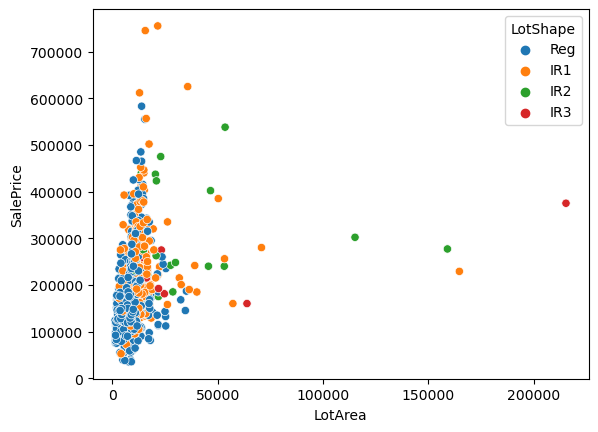

In [2004]:
# to check relation between the lot area, sale price, and how different lot shapes are distributed within the dataset.
sns.scatterplot(data = df,x = 'LotArea',y ='SalePrice',hue = 'LotShape')

In [2005]:
#Observation

#The IR1 plot is more pricier for the same area when compared with regular plot

In [2006]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data Preprocessing

In [2007]:
#set Id as index
df=df.set_index("Id")

## Handling Missing Value

In [2008]:
#as per domain knowledge we will not drop those features ,instead None value we will add constant value NA "
miss_value_50_perc=null_percent[null_percent>50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [2009]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [2010]:
#as per domain knowledge we will not drop those features ,instead None value we will add constant value NA "
miss_value_20_50_perc=null_percent[(null_percent>20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [2011]:
#the fireplace missing values were missing due due to non availability of fireplace in the house.

In [2012]:
miss_value_5_20_perc=null_percent[(null_percent>5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [2013]:
#lotfrontage is distance between the street and property

In [2014]:
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

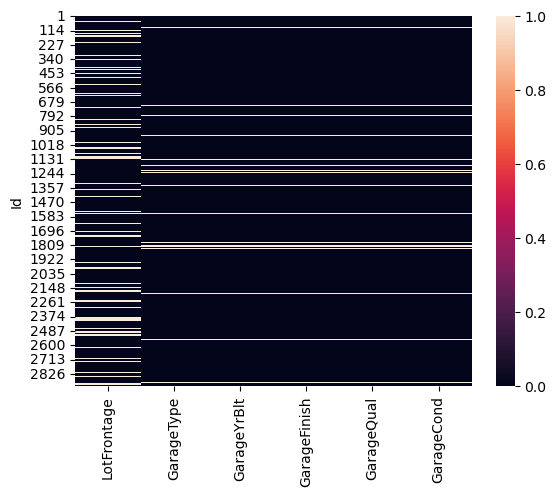

In [2015]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

### As per observation we will not drop any feature from the dataset

## Missing Value imputation

In [2016]:
missing_col = null_percent[null_percent>0]
missing_col

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [2017]:
num_features=df.select_dtypes(include=['number']).columns
num_na_feat=missing_col[missing_col.keys().isin(num_features)]
num_na_feat

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [2018]:
cat_features=df.select_dtypes(include=['object']).columns

In [2019]:
cat_na_feat=missing_col[missing_col.keys().isin(cat_features)]
cat_na_feat

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [2020]:
int_features=df.select_dtypes(include=['int']).columns

In [2021]:
int_na_feat=missing_col[missing_col.keys().isin(int_features)]
int_na_feat

Series([], dtype: float64)

### Handling MSZoning=0.1370

In [2022]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [2023]:
df_mvi=df.copy()
df_mvi.shape

(2919, 80)

In [2024]:
mszoning_mode=df_mvi["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

### Handling Alley =93.216855

In [2025]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [2026]:
alley_cont="NA"
df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True)
df_mvi["Alley"].isnull().sum()

0

### Handling LotFrontage=16.6495

In [2027]:
lotfrontage_mean=df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan,lotfrontage_mean,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

0

### Handling Utilities=0.068517

In [2028]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [2029]:
utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Utilities"].isnull().sum()


0

In [2030]:
### Handling exterior1st=0.034258 Exterior2nd=0.0342

In [2031]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [2032]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [2033]:
Exterior1st_mode=df["Exterior1st"].mode()[0]
Exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Exterior2nd"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Exterior1st"].isnull().sum()
df_mvi["Exterior2nd"].isnull().sum()


0

In [2034]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN


In [2035]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [2036]:
MasVnrType_mode=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

0

In [2037]:
masvnarea_cont=0
df_mvi["MasVnrArea"].replace(np.nan,masvnarea_cont,inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

0

### Handling basement features

In [2038]:
bsmt_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
bsmt_feat = df[bsmt_col]
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
1,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,856.0
2,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,1262.0
3,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,920.0
4,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,756.0
5,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...
2915,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,546.0
2916,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,546.0
2917,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,1224.0


In [2039]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtCond      2837 non-null   object 
 1   BsmtExposure  2837 non-null   object 
 2   BsmtFinSF1    2918 non-null   float64
 3   BsmtFinSF2    2918 non-null   float64
 4   BsmtFinType1  2840 non-null   object 
 5   BsmtFinType2  2839 non-null   object 
 6   BsmtFullBath  2917 non-null   float64
 7   BsmtHalfBath  2917 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtUnfSF     2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB


In [2040]:
bsmt_feat.isnull().sum()

BsmtCond        82
BsmtExposure    82
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFinType1    79
BsmtFinType2    80
BsmtFullBath     2
BsmtHalfBath     2
BsmtQual        81
BsmtUnfSF        1
TotalBsmtSF      1
dtype: int64

In [2041]:
cat_bsmt_feat=["BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtQual"]

In [2042]:
num_bsmt_feat=["BsmtFinSF1","BsmtFinSF2","BsmtFullBath","BsmtHalfBath","BsmtUnfSF","TotalBsmtSF"]

In [2043]:
bsmt_cont="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)
    

In [2044]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtQual        0
dtype: int64

In [2045]:
bsmt_num=0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)

In [2046]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

In [2047]:
bsmt_num=0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)

In [2048]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

### Handling Electrical =0.034258 KitchenQual=0.034258

In [2049]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [2050]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [2051]:
electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,electrical_mode,inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [2052]:
kitchenQual_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,kitchenQual_mode,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

### handling remaining cat features

In [2053]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [2054]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [2055]:
Functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,Functional_mode,inplace=True)
df_mvi["Functional"].isnull().sum()

0

In [2056]:
SaleType_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,SaleType_mode,inplace=True)
df_mvi["SaleType"].isnull().sum()

0

In [2057]:
l=["PoolQC","FireplaceQu","Fence","MiscFeature"]
for feat in l:
    df_mvi[feat].replace(np.nan,"NA",inplace=True)
    print(df_mvi[feat].isnull().sum())

0
0
0
0


### handling garage feature

In [2058]:
num_garage_feat=["GarageYrBlt","GarageCars","GarageArea"]
cat_garage_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]



In [2059]:
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,"NA",inplace=True)
    print(df_mvi[feat].isnull().sum())

0
0
0
0


In [2060]:
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,0,inplace=True)
    print(df_mvi[feat].isnull().sum())

0
0
0


In [2061]:
df_mvi.isnull().any(axis=1).sum()

1459

## Feature Transformation

#### Convert numerical feature to categorical feature

In [2062]:
 # converting columns in str which have categorical nature but in int64
feat_dtype_convert = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in feat_dtype_convert:
    df_mvi[i] = df_mvi[i].astype(str)

In [2063]:
df_mvi['MoSold'].unique() # MoSold = Month of sold

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [2064]:
# conver in month abbrevation
import calendar
df_mvi['MoSold'] = df_mvi['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [2065]:
df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

### Ordinal Encoding

In [2066]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [2067]:
ordinal_end_var=['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','PoolQC',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond','Functional','GarageFinish', 'PavedDrive','Utilities']

In [2068]:
from pandas.api.types import CategoricalDtype

In [2069]:
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [2070]:
df_mvi['ExterQual'].unique()

array([3, 2, 4, 1], dtype=int8)

In [2071]:
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [2072]:
df_mvi['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int8)

In [2073]:
df_mvi['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=["No",'NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes

In [2074]:
df_mvi['BsmtExposure'].unique()

array([ 0,  4,  2,  3, -1], dtype=int8)

In [2075]:
# List of features
features = [
    'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterQual', 'ExterCond',
    'Functional', 'GarageCond', 'GarageQual', 'GarageFinish', 'HeatingQC',
    'KitchenQual', 'PavedDrive', 'Utilities','SaleType','FireplaceQu','PoolQC'
]

# Dictionary to store unique values for each feature
unique_values = {}

# Loop through each feature and get unique values
for feature in features:
    unique_values[feature] = df_mvi[feature].unique()

# Print unique values for each feature
for feature, values in unique_values.items():
    print(f"Unique values for {feature}: {values}")


Unique values for BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
Unique values for BsmtFinType2: ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique values for BsmtQual: ['Gd' 'TA' 'Ex' 'NA' 'Fa']
Unique values for ExterQual: [3 2 4 1]
Unique values for ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values for Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Unique values for GarageCond: ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
Unique values for GarageQual: ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
Unique values for GarageFinish: ['RFn' 'Unf' 'Fin' 'NA']
Unique values for HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Unique values for KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values for PavedDrive: ['Y' 'N' 'P']
Unique values for Utilities: ['AllPub' 'NoSeWa']
Unique values for SaleType: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
Unique values for FireplaceQu: ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Unique values for PoolQC: ['NA' 'Ex' 'Fa' 'Gd']


In [2076]:
# Convert columns to categorical type with specified categories and then get the codes
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'],
        ordered=True
    )
).cat.codes

df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'],
        ordered=True
    )
).cat.codes

df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ordered=True
    )
).cat.codes

df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(
    pd.CategoricalDtype(
        categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ordered=True
    )
).cat.codes

df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(
    pd.CategoricalDtype(
        categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ordered=True
    )
).cat.codes

df_mvi['Functional'] = df_mvi['Functional'].astype(
    pd.CategoricalDtype(
        categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'],
        ordered=True
    )
).cat.codes

df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ordered=True
    )
).cat.codes

df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ordered=True
    )
).cat.codes

df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'Unf', 'RFn', 'Fin'],
        ordered=True
    )
).cat.codes

df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(
    pd.CategoricalDtype(
        categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ordered=True
    )
).cat.codes

df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(
    pd.CategoricalDtype(
        categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ordered=True
    )
).cat.codes

df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(
    pd.CategoricalDtype(
        categories=['N', 'P', 'Y'],
        ordered=True
    )
).cat.codes

df_mvi['Utilities'] = df_mvi['Utilities'].astype(
    pd.CategoricalDtype(
        categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'],
        ordered=True
    )
).cat.codes

df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
        ordered=True
    )
).cat.codes

df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(
    pd.CategoricalDtype(
        categories=['NA', 'Ex', 'Fa', 'Gd'],
        ordered=True
    )
).cat.codes


In [2077]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [2078]:
# #checking for outliers
# plt.figure(figsize=(22, 10))

# sns.boxplot(df_mvi)
# plt.title('Box Plot of Performance Index')
# plt.xlabel('Performance Index')
# plt.xticks(rotation=90)


# plt.show()

In [2079]:
# #removing outliers
# df_num=df_mvi.select_dtypes('number').drop('SalePrice',axis=1)
# Q1 = df_num.quantile(0.25)
# Q3 = df_num.quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_mvi.shape

In [2080]:
# # removing outliers
# df_mvi = df_mvi[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [2081]:
# df_mvi.shape

In [2082]:
# df_num=df_mvi.select_dtypes('number')
# df_num

In [2083]:
# df_mvi.isnull().sum()

In [2084]:
# ss= StandardScaler()
# df_num=df_num.drop(['SalePrice'],axis=1)
# df_scaled=ss.fit_transform(df_num)
# df_scaled=pd.DataFrame(df_scaled,columns=df_num.columns)

In [2085]:
# df_num.isnull().sum()

In [2086]:
df_encod=df_mvi.copy()
object_features=df_encod.select_dtypes(include="object").columns.tolist()
print("Features: \n",object_features)

Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [2088]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal


In [2089]:
print("shape of dataFrame before encoding:",df_encod.shape)
df_encod=pd.get_dummies(df_encod,columns=object_features,prefix=object_features,drop_first=True)
print("shape of dataFrame after encoding:",df_encod.shape)

shape of dataFrame before encoding: (2919, 80)
shape of dataFrame after encoding: (2919, 515)


In [2090]:
df_encod

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,-1,2,4,3,...,False,False,False,False,True,False,False,False,True,False
2,80.0,9600,3,6,8,0.0,-1,2,4,3,...,False,False,False,False,True,False,False,False,True,False
3,68.0,11250,3,7,5,162.0,-1,2,4,3,...,False,False,False,False,True,False,False,False,True,False
4,60.0,9550,3,7,5,0.0,-1,2,3,4,...,False,False,False,False,True,False,False,False,False,False
5,84.0,14260,3,8,5,350.0,-1,2,4,3,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,3,4,7,0.0,-1,2,3,3,...,False,False,False,False,True,False,False,False,True,False
2916,21.0,1894,3,4,5,0.0,-1,2,3,3,...,False,False,False,False,True,False,False,False,False,False
2917,160.0,20000,3,5,7,0.0,-1,2,3,3,...,False,False,False,False,True,False,False,False,False,False


In [1640]:
# df_encod["MSZoning"].value_counts()

In [1641]:
# pd.get_dummies(df_encod["MSZoning"],columns="MSZoning",prefix="MSZoning",drop_first=False).astype(int)

In [2091]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

# split data for training and testing

In [2092]:
len_train=train.shape[0]
len_train

1460

In [2093]:
test.shape[0]

1459

In [2100]:
df_encod.shape

(2919, 515)

In [2101]:
len_train=train.shape[0]
len_train

1460

In [2106]:
X_train=df_encod[:len_train].drop("SalePrice",axis=1)
y_train=df_encod["SalePrice"][:len_train]

X_test=df_encod[len_train:].drop("SalePrice",axis=1)

print("Shape of X_train data:",X_train.shape)
print("Shape of X_train data:",y_train.shape)
print("Shape of X_train data:",X_test.shape)

Shape of X_train data: (1460, 514)
Shape of X_train data: (1460,)
Shape of X_train data: (1459, 514)


In [2108]:
## Feature Scaling

In [2107]:
ss= StandardScaler()
ss.fit_transform(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
# Train ML Model

In [2109]:
from sklearn.linear_model import LinearRegression

In [2111]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [2118]:
y_pred_train = lr.predict(X_train)

In [2124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2126]:
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print("MSE:",mse)
print("R2:",r2)

MSE: 397829756.2254798
R2: 0.9369203912828725


### THE RESULT WE GOT BEFORE USING EIGEN VALUE IS MSE:397829756.2254798

## #EIGEN VALUE DECOMPOSITION TO FIND PRINCIPAL COMPONENTS

## 1.Using only numerical column of dataset

In [2178]:
num_cols=df.select_dtypes('number').columns.tolist()
num_cols.remove('SalePrice')
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [2180]:
discrete_cols=[col for col in num_cols if df[col].nunique()<=25]
discrete_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [2181]:
continous_cols=[col for col in num_cols if col not in discrete_cols]
continous_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [2183]:
#missing values in discrete numerical columns:
num_cols_null=[]
for i in discrete_cols:
    if df[i].isnull().sum()>0:
        print(i,':',df[i].isnull().sum())
        num_cols_null.append(i) 

BsmtFullBath : 2
BsmtHalfBath : 2
GarageCars : 1


In [2186]:
#imputing missing values in discrete numerical columns:
for i in discrete_cols:
    df[i].fillna(df[i].mode().values[0], inplace=True)

In [2188]:
#missing values in continous numerical columns:
num_cols_null=[]
for i in continous_cols:
    if df[i].isnull().sum()>0:
        print(i,':',df[i].isnull().sum())
        num_cols_null.append(i)   

LotFrontage : 486
MasVnrArea : 23
BsmtFinSF1 : 1
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
GarageYrBlt : 159
GarageArea : 1


In [2189]:
#imputing missing values in continous numerical columns:
for i in continous_cols:
    if df[i].skew()>2 and df[i].skew()<-2:
        df[i].fillna(df[i].mean(), inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [ ]:
#selecting a specific set of numeric columns based on their correlation with 'SalePrice', and adding a predefined set of categorical columns.
#Then we are subsetting the original data to include only these important columns.
#This can be useful for further analysis or modeling.

In [2191]:
important_num_cols = list(df.select_dtypes('number').corr()["SalePrice"][(df.select_dtypes('number').corr()["SalePrice"]>0.5) | (df.select_dtypes('number').corr()["SalePrice"]<-0.20)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]
df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
Id,,,,,,,,,,,,,,,,,,
1,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,208500.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,181500.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
3,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,223500.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,140000.0,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
5,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,250000.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [2192]:
data_num=df.select_dtypes('number')

In [2237]:
df.shape
df.dropna(inplace = True)

In [2238]:
df.select_dtypes('number').isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [2240]:
ss= StandardScaler()
df_num=df.select_dtypes('number')
df_num=df_num.drop(['SalePrice'],axis=1)
df_scaled=ss.fit_transform(df_num)
df_scaled=pd.DataFrame(df_scaled,columns=df_num.columns)

In [2241]:
# A is the correlation matrix of numerical features in the data
df_scaled_corr=df_num.corr()
A=df_scaled_corr
A

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000


In [2242]:
u,V=la.eig(A)
u=u.real

In [2243]:
print('Eigenvalues: ',u)

Eigenvalues:  [5.17974356 1.42790292 1.08958101 0.81442138 0.445324   0.36372778
 0.28290028 0.10451761 0.13591608 0.15596539]


In [2244]:
arr = (u/u.sum())*100
arr

array([51.79743559, 14.2790292 , 10.89581013,  8.14421379,  4.45323995,
        3.63727776,  2.82900277,  1.04517608,  1.35916082,  1.55965391])

In [2245]:
arr[0:4].sum()

85.11648870509852

In [ ]:
 #Interpretation: 85.10483917773655 of the variance can be described by First 4 Eigen Value. Hence we are choosing 4 of these components

In [2246]:
print('Eigen Vector: ',V)

Eigen Vector:  [[-0.3620734  -0.10673725  0.08590042 -0.13387028  0.23766316 -0.76704643
   0.34741478  0.11759056  0.21666671 -0.07679091]
 [-0.27878501 -0.50000002  0.09998498 -0.18383844 -0.40555048 -0.17779282
  -0.62823209  0.01566913 -0.10808875 -0.16062249]
 [-0.26150732 -0.38643298  0.29185437 -0.36280155  0.58006218  0.4732696
   0.05961498 -0.00416716 -0.00818466  0.03721546]
 [-0.30864506  0.04923944 -0.56765557 -0.30726842 -0.03966432 -0.02165563
  -0.01400939 -0.10948519 -0.17199981  0.66472366]
 [-0.31391267  0.20859236 -0.51491499 -0.2270133  -0.05238016  0.25560995
   0.0219613   0.07186198  0.31514485 -0.60682184]
 [-0.33814515  0.44200256  0.17287134  0.00230924  0.13368755 -0.08111394
  -0.05813665 -0.28031745 -0.69619472 -0.26325862]
 [-0.31854446  0.09667293  0.40260342 -0.15433865 -0.63060156  0.24140546
   0.47389381  0.07085097  0.05183345  0.12270698]
 [-0.27411304  0.52204748  0.30282026  0.06629881  0.13797929  0.02068129
  -0.49680492  0.18761385  0.43020921

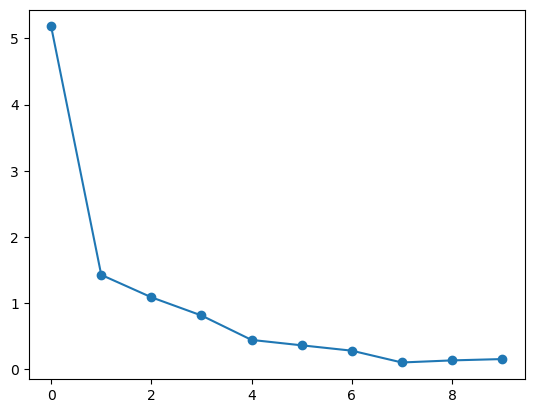

In [2247]:
plt.plot(u,marker='o')

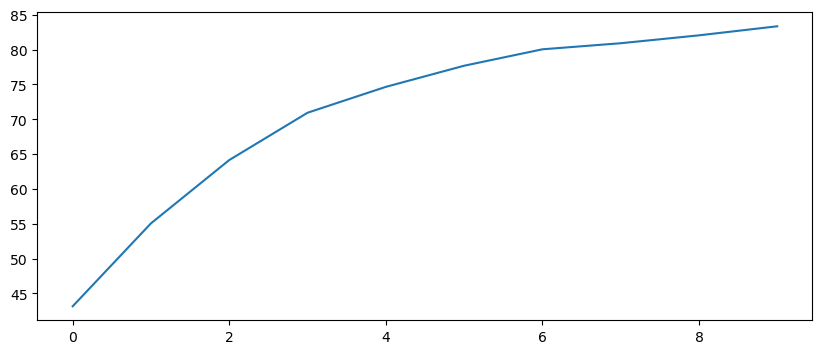

In [2248]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(u)*100/12)
plt.show()

In [2249]:
u.sum()

10.000000000000005

In [2250]:
# checking the percentage of variance contribution of each feature.
(u/u.sum())*100

array([51.79743559, 14.2790292 , 10.89581013,  8.14421379,  4.45323995,
        3.63727776,  2.82900277,  1.04517608,  1.35916082,  1.55965391])

In [2251]:
# Interpretation: 
# (49.89022574+14.16947213+12.59984291+8.4452984) = 85.10483917999998 of the variance is contributed by the first 4 components.

In [2252]:
print(A.shape,u.shape,V.shape)

(10, 10) (10,) (10, 10)


In [2253]:
cols=['PC'+str(i) for i in range(1,11)]

In [2254]:
data_num.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
1,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,208500.0
2,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,181500.0
3,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,223500.0
4,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,140000.0
5,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,250000.0


In [2256]:
P=pd.DataFrame(V,index = df_num.columns,columns = cols)
P

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
OverallQual,-0.362073,-0.106737,0.085900,-0.133870,0.237663,-0.767046,0.347415,0.117591,0.216667,-0.076791
YearBuilt,-0.278785,-0.500000,0.099985,-0.183838,-0.405550,-0.177793,-0.628232,0.015669,-0.108089,-0.160622
YearRemodAdd,-0.261507,-0.386433,0.291854,-0.362802,0.580062,0.473270,0.059615,-0.004167,-0.008185,0.037215
TotalBsmtSF,-0.308645,0.049239,-0.567656,-0.307268,-0.039664,-0.021656,-0.014009,-0.109485,-0.172000,0.664724
1stFlrSF,-0.313913,0.208592,-0.514915,-0.227013,-0.052380,0.255610,0.021961,0.071862,0.315145,-0.606822
GrLivArea,-0.338145,0.442003,0.172871,0.002309,0.133688,-0.081114,-0.058137,-0.280317,-0.696195,-0.263259
FullBath,-0.318544,0.096673,0.402603,-0.154339,-0.630602,0.241405,0.473894,0.070851,0.051833,0.122707
TotRmsAbvGrd,-0.274113,0.522047,0.302820,0.066299,0.137979,0.020681,-0.496805,0.187614,0.430209,0.263956
GarageCars,-0.348710,-0.198982,-0.041841,0.556219,0.003333,0.083182,0.044074,-0.664763,0.274461,0.039572
GarageArea,-0.341238,-0.162794,-0.157003,0.577155,0.060629,0.134302,0.060680,0.638790,-0.254210,0.035036


## Name of the Component:

#### PC1 --> Overall Quality component
#### PC2 --> No of rooms in a house
#### PC3 --> Size of the house in Sqft 
#### PC4 --> GarageSize

In [2258]:
df_pcs = np.dot(df_scaled,V[:,:4])
df_pcs.shape

(1460, 4)

In [2260]:
df_pcs

array([[-1.22315107, -0.52561719,  1.67682246,  0.03745501],
       [-0.21907017, -0.18352442, -0.37854238, -0.07084404],
       [-1.09635421, -1.05637876,  1.09614049,  0.06552534],
       ...,
       [-0.80156162,  2.00058955,  1.35557517, -1.54046794],
       [ 1.99200873, -0.38793428, -0.52096776, -1.03027333],
       [ 1.63568493,  0.50381369, -1.15874099, -0.66713288]])

In [2261]:
df[['PC1','PC2','PC3','PC4']] = df_pcs


In [2262]:
df.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope,PC1,PC2,PC3,PC4
Id,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,...,AllPub,1Fam,GasA,Gd,Normal,Gtl,-1.223151,-0.525617,1.676822,0.037455
2,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,...,AllPub,1Fam,GasA,TA,Normal,Gtl,-0.219070,-0.183524,-0.378542,-0.070844
3,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,...,AllPub,1Fam,GasA,Gd,Normal,Gtl,-1.096354,-1.056379,1.096140,0.065525
4,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,...,AllPub,1Fam,GasA,Gd,Abnorml,Gtl,0.118380,0.766145,-0.131890,2.399619
5,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,...,AllPub,1Fam,GasA,Gd,Normal,Gtl,-3.266899,-0.062338,1.006855,1.204578


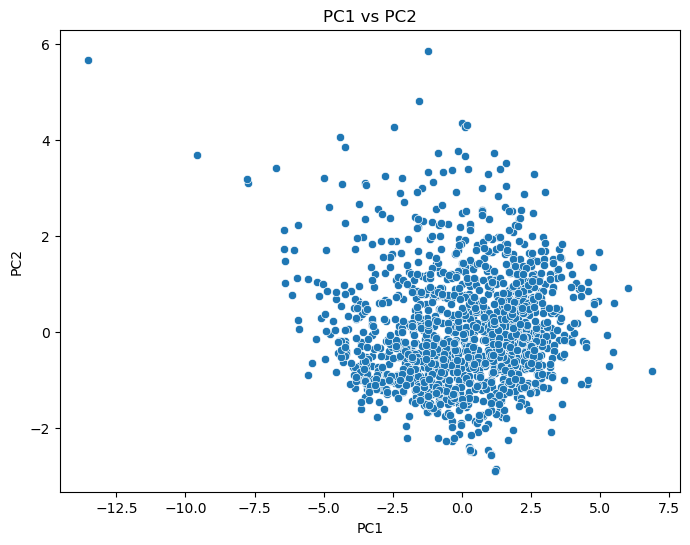

In [2263]:
# Scatter Plot for PC1 vs PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2')
plt.title('PC1 vs PC2')
plt.show()

In [ ]:
# Interpretation:
#1. As the points are scattered that implies the PC1 and PC2 have successfully captured the variations in our data and are independent of each other

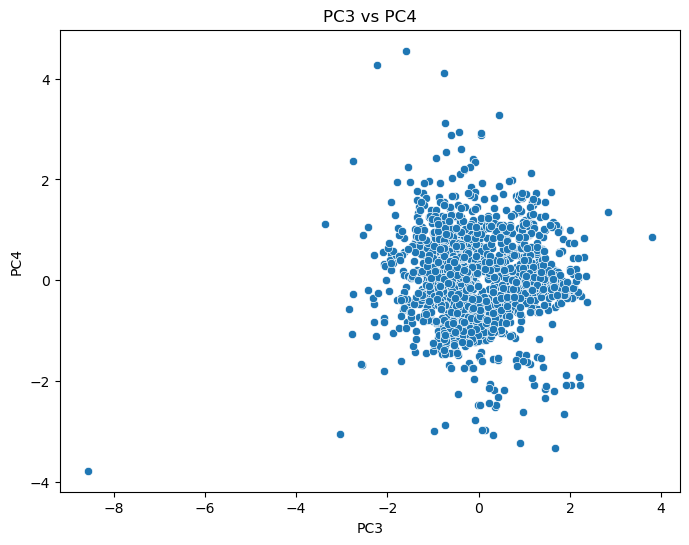

In [2264]:
# Scatter Plot for PC3 vs PC4
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC3', y='PC4')
plt.title('PC3 vs PC4')
plt.show()

In [ ]:
# Interpretation:
#1.  As the points are clustered in the middle this implies the PCs have some similarities in higher dimensional space.
#2.Although points are scattered which describes that the PCS have captured the variation in the data.

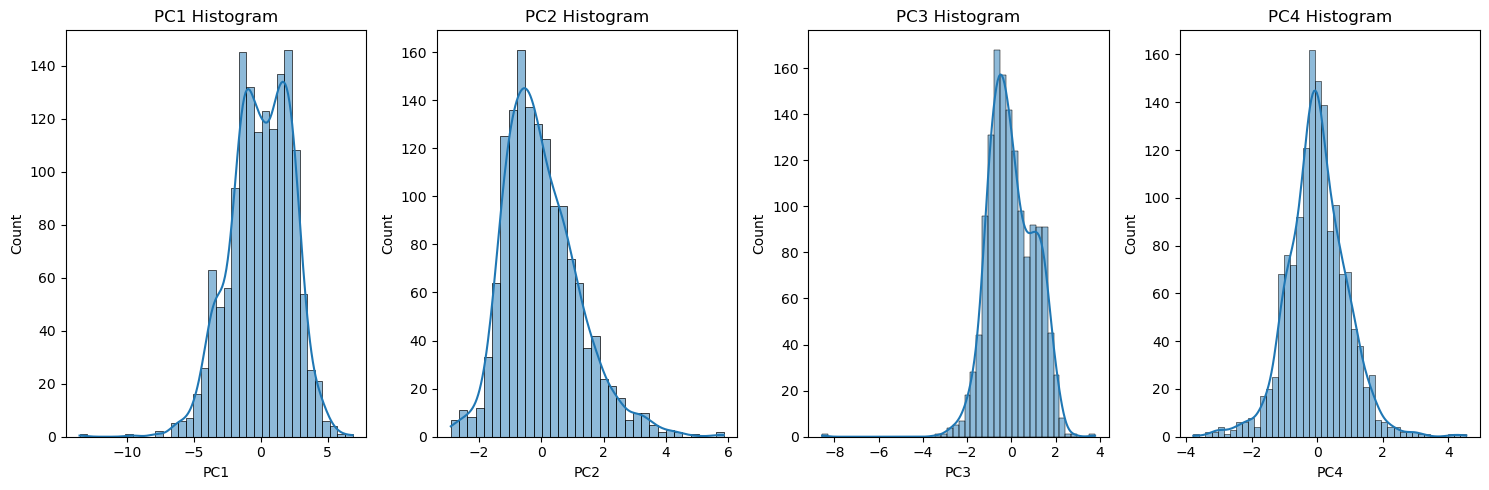

In [2265]:
# Histograms for PC1, PC2, PC3, and PC4
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(df['PC1'], kde=True)
plt.title('PC1 Histogram')

plt.subplot(1, 4, 2)
sns.histplot(df['PC2'], kde=True)
plt.title('PC2 Histogram')

plt.subplot(1, 4, 3)
sns.histplot(df['PC3'], kde=True)
plt.title('PC3 Histogram')

plt.subplot(1, 4, 4)
sns.histplot(df['PC4'], kde=True)
plt.title('PC4 Histogram')

plt.tight_layout()
plt.show()


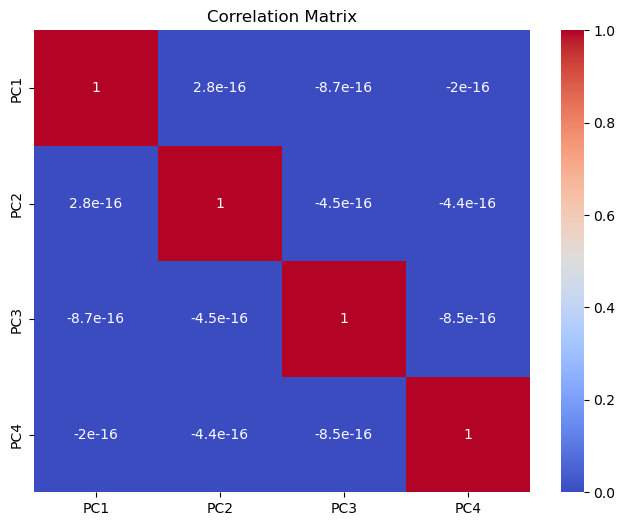

In [2267]:
# Correlation Analysis
correlation_matrix = df[['PC1', 'PC2', 'PC3', 'PC4']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Conclusion:The correlation matrix above affirms that the principal components are orthogonal. This means that each component captures a unique and independent source of variability in the data. It also indicates that the principal components are effectively representing distinct aspects of the dataset.

### 2.EIGEN VALUE DECOMPOSITION TO FIND ALL THE PCA CONSIDERING CATEGORICAL AND NUMERICAL COLUMN BOTH

In [2269]:
import numpy as np

# Assuming 'X' is your data matrix (features in columns)
# Step 1: Standardize the data
ss= StandardScaler()
df_num=df_encod.select_dtypes('number')
df_num=df_num.drop(['SalePrice'],axis=1)
df_scaled=ss.fit_transform(df_num)
df_scaled=pd.DataFrame(df_scaled,columns=df_num.columns)


In [2270]:
df_num.shape

(2919, 47)

In [2271]:
u,V=la.eig(cov_matrix)
u=u.real

In [2272]:
print('Eigenvalues: ',u)

Eigenvalues:  [8.68291326e+00 3.82591471e+00 2.61440910e+00 2.25446578e+00
 2.03827523e+00 1.81440035e+00 1.72890538e+00 1.46152435e+00
 1.41363327e+00 1.20241411e+00 1.13024279e+00 1.10004301e+00
 1.07491723e+00 1.03205559e+00 9.93038782e-01 9.84275658e-01
 9.61261466e-01 9.01930438e-01 8.62219989e-01 8.34900117e-01
 7.98427498e-01 7.37491410e-01 6.68682096e-01 6.30492826e-01
 6.23365964e-01 5.87539064e-01 5.78017975e-01 5.17674639e-02
 5.07271232e-01 4.85407292e-01 4.56286925e-01 9.06818175e-02
 3.86988817e-01 3.57104254e-01 1.20054139e-01 1.37912507e-01
 3.19071010e-01 2.93078967e-01 1.70338906e-01 1.77405239e-01
 1.97184105e-01 2.57641284e-01 2.41028844e-01 2.30783984e-01
 1.93229568e-16 4.93054077e-16 0.00000000e+00]


In [2273]:
eigenvalue_idx = np.argsort(u)[::-1]
eigenvalue_idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 33, 36, 37,
       41, 42, 43, 40, 39, 38, 35, 34, 31, 27, 45, 44, 46], dtype=int64)

In [2274]:
eigenvalues = eigenvalues[eigenvalue_idx]
eigenvalues

array([8.68291326e+00, 3.82591471e+00, 2.61440910e+00, 2.25446578e+00,
       2.03827523e+00, 1.81440035e+00, 1.72890538e+00, 1.46152435e+00,
       1.41363327e+00, 1.20241411e+00, 1.13024279e+00, 1.10004301e+00,
       1.07491723e+00, 1.03205559e+00, 9.93038782e-01, 9.84275658e-01,
       9.61261466e-01, 9.01930438e-01, 8.62219989e-01, 8.34900117e-01,
       7.98427498e-01, 7.37491410e-01, 6.68682096e-01, 6.30492826e-01,
       6.23365964e-01, 5.87539064e-01, 5.78017975e-01, 4.56286925e-01,
       3.86988817e-01, 3.19071010e-01, 2.30783984e-01, 1.97184105e-01,
       5.17674639e-02, 1.37912507e-01, 2.57641284e-01, 3.57104254e-01,
       5.07271232e-01, 2.41028844e-01, 1.77405239e-01, 1.70338906e-01,
       9.06818175e-02, 1.20054139e-01, 2.93078967e-01, 4.85407292e-01,
       4.93054077e-16, 1.93229568e-16, 0.00000000e+00])

In [2275]:
eigenvectors = eigenvectors[:, eigenvalue_idx]
eigenvectors

array([[-1.35362650e-01,  5.95878009e-02, -2.18182786e-01, ...,
        -2.16063022e-19,  1.69982064e-16,  0.00000000e+00],
       [-1.00421644e-01,  2.31538927e-02, -2.37834001e-01, ...,
         2.26001337e-17, -5.16669050e-17,  0.00000000e+00],
       [ 1.90117862e-03,  8.77663596e-03,  9.84262314e-03, ...,
         4.20464097e-17,  6.09900165e-18,  0.00000000e+00],
       ...,
       [-3.78073467e-02,  1.55431288e-02, -2.59052754e-01, ...,
        -1.83620243e-16, -5.33695105e-16,  0.00000000e+00],
       [-4.33488608e-02,  2.80191649e-03, -2.56049226e-01, ...,
         2.75782820e-16,  5.63518823e-16,  0.00000000e+00],
       [-1.52042978e-02,  1.98182433e-03, -7.87826843e-02, ...,
         1.52060179e-16,  3.30291142e-17,  0.00000000e+00]])

In [2276]:
arr = (u/u.sum())*100
arr

array([1.88694318e+01, 8.31435656e+00, 5.68155097e+00, 4.89933356e+00,
       4.42951511e+00, 3.94299732e+00, 3.75720237e+00, 3.17613839e+00,
       3.07206300e+00, 2.61304822e+00, 2.45620779e+00, 2.39057859e+00,
       2.33597605e+00, 2.24283049e+00, 2.15804040e+00, 2.13899666e+00,
       2.08898294e+00, 1.96004663e+00, 1.87374915e+00, 1.81437847e+00,
       1.73511733e+00, 1.60269295e+00, 1.45315873e+00, 1.37016702e+00,
       1.35467915e+00, 1.27682127e+00, 1.25613034e+00, 1.12499411e-01,
       1.10238576e+00, 1.05487174e+00, 9.91588279e-01, 1.97066851e-01,
       8.40991828e-01, 7.76047643e-01, 2.60897850e-01, 2.99707089e-01,
       6.93395004e-01, 6.36909919e-01, 3.70175111e-01, 3.85531442e-01,
       4.28514246e-01, 5.59897870e-01, 5.23796242e-01, 5.01532439e-01,
       4.19920372e-16, 1.07148949e-15, 0.00000000e+00])

In [2277]:
arr[0:5].sum()

42.19418802587831

In [2278]:
cumulative_variance = np.cumsum(u)

# Calculate the percentage of cumulative explained variance
explained_variance_ratio = cumulative_variance / np.sum(u)

# Find the number of components needed to explain 95% or more of the variance
num_components_95_percent = np.argmax(explained_variance_ratio >= 0.85) + 1

print(f"Ideal number of components for 95% explained variance: {num_components_95_percent}")

Ideal number of components for 95% explained variance: 23


In [2279]:
# Step 5: Choose top k eigenvectors (where k is the desired number of components)
k = 23  # Example: Selecting top 2 components
transformation_matrix = eigenvectors[:, :k]
print("Transformation matrix:",transformation_matrix)


Transformation matrix: [[-1.35362650e-01  5.95878009e-02 -2.18182786e-01 ...  1.12751785e-01
  -2.13866487e-01  3.13579692e-02]
 [-1.00421644e-01  2.31538927e-02 -2.37834001e-01 ... -1.00367693e-01
  -1.29770529e-01 -2.17387919e-01]
 [ 1.90117862e-03  8.77663596e-03  9.84262314e-03 ...  4.99971141e-02
   1.71795279e-02  3.79721397e-02]
 ...
 [-3.78073467e-02  1.55431288e-02 -2.59052754e-01 ...  1.34488181e-04
  -1.77924085e-02 -3.38699704e-02]
 [-4.33488608e-02  2.80191649e-03 -2.56049226e-01 ...  1.98936595e-02
   7.09705750e-03 -6.33312545e-02]
 [-1.52042978e-02  1.98182433e-03 -7.87826843e-02 ... -1.25874596e-01
  -2.33804073e-01 -1.16567820e-01]]


In [2280]:
X_pca = df_scaled.dot(transformation_matrix)
print("PCAs:",X_pca)


PCAs:             0         1         2         3         4         5         6   \
0    -1.341586  0.413498  1.272473 -0.412747 -1.871943 -1.614766  0.146068   
1    -0.941574 -1.899628 -0.362446 -0.383818 -0.065982  0.324228  0.290659   
2    -1.877153  0.059968  0.994396 -0.283986 -1.448034 -1.174250  0.222654   
3    -0.494743  0.197062  0.402020 -0.771455 -0.082853 -0.009446  0.201774   
4    -4.370563  1.292809  0.139582 -0.547264 -1.482950 -1.221535 -0.445445   
...        ...       ...       ...       ...       ...       ...       ...   
2914  6.145388  1.401921 -0.325171  1.229855 -4.012017  0.901463  1.407077   
2915  3.579977  0.222175  1.829479 -1.015398 -0.777830 -0.921398  0.466763   
2916 -0.888939 -1.378866 -2.160403 -1.065876  0.589470 -1.231331 -0.950101   
2917  4.298634 -0.658870 -2.885476  2.551582 -3.330368  1.257179  0.903578   
2918 -2.591528  1.500026  1.011321 -0.949697 -0.679619 -0.921392 -0.066991   

            7         8         9   ...        13        

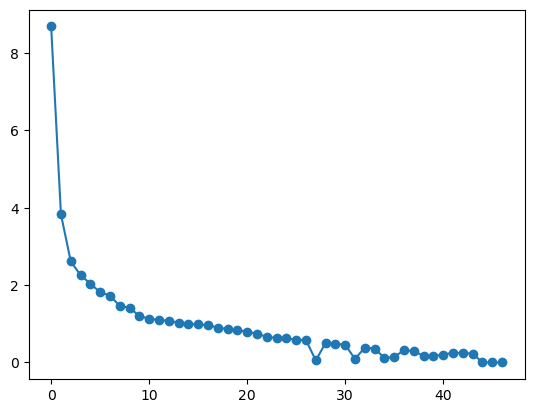

In [2281]:
plt.plot(u,marker='o')

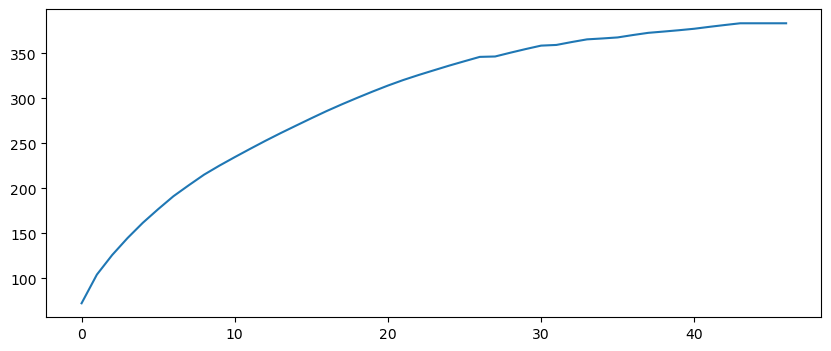

In [2282]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(u)*100/12)
plt.show()

In [2283]:
u.sum()

46.01576422206994

In [2284]:
# checking the percentage of variance contribution of each feature.
(u/u.sum())*100

array([1.88694318e+01, 8.31435656e+00, 5.68155097e+00, 4.89933356e+00,
       4.42951511e+00, 3.94299732e+00, 3.75720237e+00, 3.17613839e+00,
       3.07206300e+00, 2.61304822e+00, 2.45620779e+00, 2.39057859e+00,
       2.33597605e+00, 2.24283049e+00, 2.15804040e+00, 2.13899666e+00,
       2.08898294e+00, 1.96004663e+00, 1.87374915e+00, 1.81437847e+00,
       1.73511733e+00, 1.60269295e+00, 1.45315873e+00, 1.37016702e+00,
       1.35467915e+00, 1.27682127e+00, 1.25613034e+00, 1.12499411e-01,
       1.10238576e+00, 1.05487174e+00, 9.91588279e-01, 1.97066851e-01,
       8.40991828e-01, 7.76047643e-01, 2.60897850e-01, 2.99707089e-01,
       6.93395004e-01, 6.36909919e-01, 3.70175111e-01, 3.85531442e-01,
       4.28514246e-01, 5.59897870e-01, 5.23796242e-01, 5.01532439e-01,
       4.19920372e-16, 1.07148949e-15, 0.00000000e+00])

In [2285]:
print(A.shape,u.shape,V.shape)

(10, 10) (47,) (47, 47)


In [2286]:
#fitting the model

In [2287]:
len_train=train.shape[0]
len_train

1460

In [2288]:
X_train=df_encod[:len_train].drop("SalePrice",axis=1)
y_train=df_encod["SalePrice"][:len_train]

X_test=df_encod[len_train:].drop("SalePrice",axis=1)

print("Shape of X_train data:",X_train.shape)
print("Shape of X_train data:",y_train.shape)
print("Shape of X_train data:",X_test.shape)

Shape of X_train data: (1460, 514)
Shape of X_train data: (1460,)
Shape of X_train data: (1459, 514)


In [2289]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Choose the desired number of components
X_pca_train = pca.fit_transform(X_train) 

In [2290]:
pca = PCA(n_components=5)  # Choose the desired number of components
X_pca_test= pca.fit_transform(X_test) 

In [2291]:
from sklearn.linear_model import LinearRegression

In [2292]:
lr=LinearRegression()
lr.fit(X_pca_train,y_train)

LinearRegression()

In [2293]:
y_pred_train = lr.predict(X_pca_train)

In [2294]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2295]:
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print("MSE:",mse)
print("R2:",r2)

MSE: 2268234474.5581856
R2: 0.6403503234867733


### CONCLUSION: 
- 1.Before using the pca the MSE for the train dataset was: 397829756.2254798 and R2: 0.9369203912828725
- 2.After using pca the MSE got reduced to 2268234474.5581856
- 3.If using only numerical columns ,4 PCA was explaining the variability upto 85%
- 4.If categorical column was also considered then 23 PCA was explaining the variability upto 85.